#Blinkit UseCase
**Blinkit** is trying to find an **optimal number of delivery partners per store** for faster delivery

- Hence it has classified its store into 3 classes based on
 - how much products are delivered from a store

1. Class1 : High Traffic (Needs a high number of delivery partners)
2. Class2 : Moderate Traffic (Needs a decent number of delivery partners)
3. Class3 : Low Traffic (Needs a very small number of delivery partners)


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
!gdown 1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2


Downloading...
From: https://drive.google.com/uc?id=1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2
To: /content/multiclass.csv
100% 14.6k/14.6k [00:00<00:00, 33.1MB/s]


In [ ]:
df=pd.read_csv('multiclass.csv')
df.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,class
0,3,12669,9656,7561,214,2674,1338,2
1,3,7057,9810,9568,1762,3293,1776,2
2,3,6353,8808,7684,2405,3516,7844,2
3,3,13265,1196,4221,6404,507,1788,1
4,3,22615,5410,7198,3915,1777,5185,1


**Data Description**

|feature|Description|
|-|-|
|**Region**|where the store is located (1: Tier-1 city, 2: Tier-2 city, 3:Tier-3 city)|
|**Fresh**|Fresh food products delivery count |
|**Milk**|milk products delivery count|
|**Grocery**|Grocery products delivery count|
|**Frozen**|Frozen food products delivery count|
|**Detergents_Paper**|washing products delivery count|
|**Delicassen**|imported products, cooked meat delivery count|
|**class**|Store catgeory (Class1, Class2, Class3)|


Now lets see the count of sample each of the three classes

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=df, x="class")
plt.title('Data Distribution')
plt.show()

Lets now define our X and y for the model and visualize the data

In [ ]:
X=df[['Region',	'Fresh',	'Milk',	'Grocery',	'Frozen',	'Detergents_Paper',	'Delicassen'	]]
y=df[['class']]

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


def scatter_visualize(visualize1,visualize2,y_label):
  scatter = plt.scatter(visualize[:,0] ,visualize[:,1],c = y.values[:,0] )
  plt.legend(handles=scatter.legend_elements()[0], labels=['Class1','Class2','Class3'])
  plt.show()

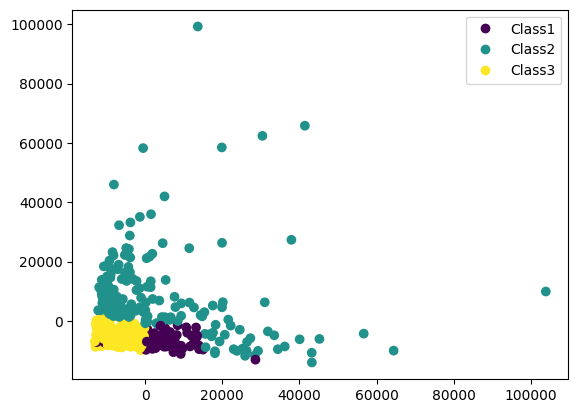

In [ ]:
# reducing features to just 2 features for visualization purpose
pca = PCA(n_components=2)
visualize = pca.fit_transform(X)


scatter_visualize(visualize[:,0] ,visualize[:,1],y.values[:,0])

**observe**

Data is not only **multi classed imbalanced** data
- It is also **Non-Linear in nature**

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X_train_val, X_test, y_train_val, y_test = train_test_split(X,y,test_size=0.25, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_val,y_train_val,test_size=0.25, random_state=42)

In [ ]:
from imblearn.over_sampling import SMOTE

# Create an instance of SMOTE
smt = SMOTE()

X_sm, y_sm = smt.fit_resample(X_train, y_train)

In [ ]:
from sklearn.preprocessing import StandardScaler

st =  StandardScaler()

X_sm = st.fit_transform(X_sm)
X_val_scaled = st.transform(X_val)
X_test_scaled = st.transform(X_test)

##Sklearn Impleamentation of KNN


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5,metric='euclidean')

knn.fit(X_sm, y_sm)


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='euclidean')

In [ ]:
knn.score(X_val_scaled, y_val)

0.891566265060241

In [ ]:
from sklearn.metrics import classification_report

y_pred = knn.predict(X_val_scaled)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           1       0.68      0.93      0.79        14
           2       0.97      0.89      0.93        38
           3       0.93      0.87      0.90        31

    accuracy                           0.89        83
   macro avg       0.86      0.90      0.87        83
weighted avg       0.91      0.89      0.90        83



##Hyper Parametertuning to make KNN best fit


In [17]:
Acc = []

# Calculating error for K values between 1 and 50
# Note: 51 is not included in the loop
for i in range(1, 51):
    knn = KNeighborsClassifier(n_neighbors=i,metric='euclidean')
    knn.fit(X_sm, y_sm)

    Acc.append(knn.score(X_val_scaled,y_val))

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

Text(0, 0.5, 'Accuracy')

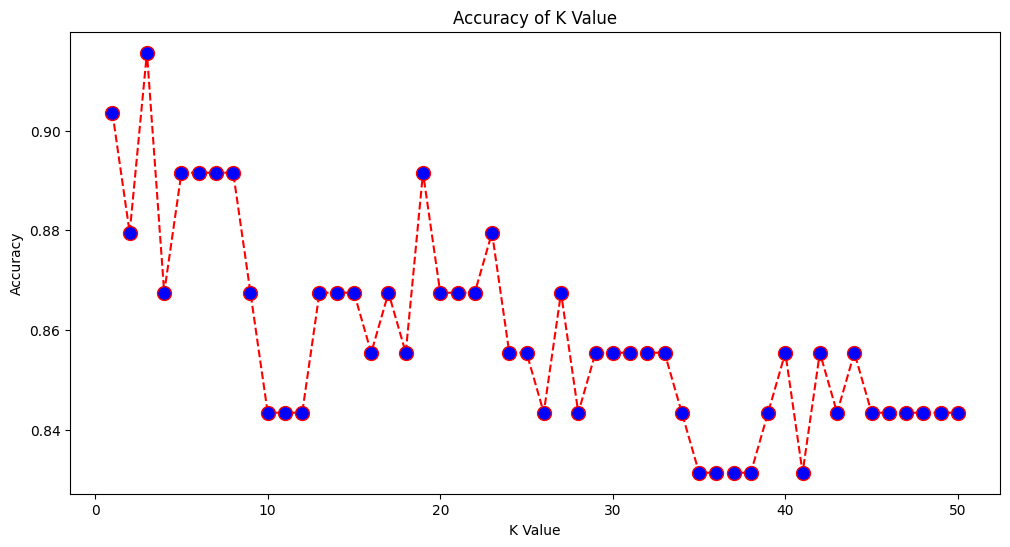

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 51), Acc, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy of K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

In [21]:
best_k = Acc.index(max(Acc)) + 1
best_accuracy = max(Acc)

print(f'The best K values is {best_k}')
print(f'The best accuracy score is {best_accuracy}')

The best K values is 3
The best accuracy score is 0.9156626506024096
